<h1 style="text-align: center; text-decoration: underline;"><strong>-------------PROJECT TITANIC--------------</strong></h1>


## OVERVIEW

The sinking of the **RMS Titanic** is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

#### EDA

The Titanic Survival Problem is a well-known data science challenge that involves predicting which passengers aboard the Titanic survived the ship's sinking in 1912. The goal of the problem is to build a model that can accurately predict whether a given passenger would have survived based on a number of features, such as their age, gender, and passenger class. 

In this project, more than modelling, we will emphasise the EDA part. We will be creating the ML models. We’ll use different algorithms and find the algorithm with the best accuracy. 

Let’s discuss about the EDA part first and why EDA is useful:

Exploratory Data Analysis (EDA) is an important step in the data science process that involves visualizing and summarizing a dataset in order to better understand its characteristics and identify any patterns or trends. EDA is especially important when working on the Titanic Survival Problem, as it can help us gain insight into the factors that may have influenced a passenger's likelihood of survival.

There are many different techniques that can be used for EDA, and the specific approach will depend on the nature of the data and the questions being asked. Some common EDA techniques for the Titanic Survival Problem might include:

Univariate analysis: This involves examining each feature individually to understand its distribution and any patterns or trends. For example, we might look at the distribution of passenger ages to see if there are any outliers or anomalies.
Bivariate analysis: This involves examining the relationship between two features. For example, we might look at the relationship between passenger class and survival rate to see if higher class passengers had a higher likelihood of survival.
Multivariate analysis: This involves examining the relationship between three or more features. For example, we might look at the relationship between age, gender, and survival rate to see if any specific combinations of these features had a particularly strong influence on survival.
By performing EDA on the Titanic passenger data, we can gain a better understanding of the characteristics of the passengers and how they may have affected their chances of survival. This information can then be used to inform the development of a machine learning model that can accurately predict which passengers survived the sinking. 

In this project we will be plotting a correlation matrix to find out the relationship between different features. 

The main libraries that we will be using for EDA are NumPy, Seaborn, and Matplotlib

 

#### ML Model

Now, coming to the modelling part of the project. We will utilise various machine learning algorithms to predict a person's survival. 

Preprocessing the data before applying machine learning algorithms is a crucial step that can significantly enhance the performance of your model. Some additional details about common pre-processing techniques include:

Handling missing values: NULL or missing values in your dataset can cause problems when training machine learning models, as many algorithms are unable to handle NULL values. There are several approaches you can take to deal with missing values, such as dropping rows or columns with missing values, imputing missing values with the mean or median of the feature, or predicting missing values using a separate model. Which approach you choose will depend on the specific characteristics of your dataset and the goals of your analysis.
Feature selection: Identifying the most relevant features in your dataset and selecting a subset to use in your model can help reduce the complexity of the model and improve its performance. There are several approaches you can take to select features, such as using statistical tests to identify the most important features, using domain knowledge to identify relevant features, or using machine learning algorithms that have built-in feature selection methods.
Feature engineering: Creating new features from existing features in your dataset can help capture additional information or trends in the data that might not be apparent in the raw features. This can be done through techniques such as combining or transforming existing features, or using domain knowledge to create features based on your understanding of the problem.
After preprocessing the data, we can move on to splitting it into a training set and a test set. This is an important step because it allows us to evaluate the performance of your model on unseen data, which is a more realistic representation of how the model will perform in practice.

After splitting the data, it is often a good idea to perform feature scaling. This is a technique that adjusts the values of numeric features so that they have a common scale. This is important because many machine learning algorithms assume that the features are on the same scale, and failing to perform feature scaling can lead to poor model performance.

Once the data is ready, we can then apply a variety of machine learning algorithms to it and compare their performance. There are many different algorithms to choose from, and the specific algorithm that works best will depend on the nature of the data and the prediction task. Some common algorithms for the Titanic Survival Problem include:

Logistic Regression
Decision Trees
Random Forests
Support Vector Machines
K-Nearest Neighbors
After training and evaluating each algorithm, we can then compare their performance to see which one provides the most accurate predictions. To do this, we can use metrics like accuracy. These metrics will give you an idea of how well the model is able to correctly predict the survival of passengers. 

 **DATASET** : https://www.kaggle.com/c/titanic/data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

sns.set(rc = {'figure.figsize' : (12, 10)})

### Loading Dataset

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Types of Features** :

- **Categorical** - Sex, and Embarked.
- **Continuous** - Age, Fare
- **Discrete** - SibSp, Parch.
- **Alphanumeric** - Cabin


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color = "green"> **Numerical Value Analysis**</font>

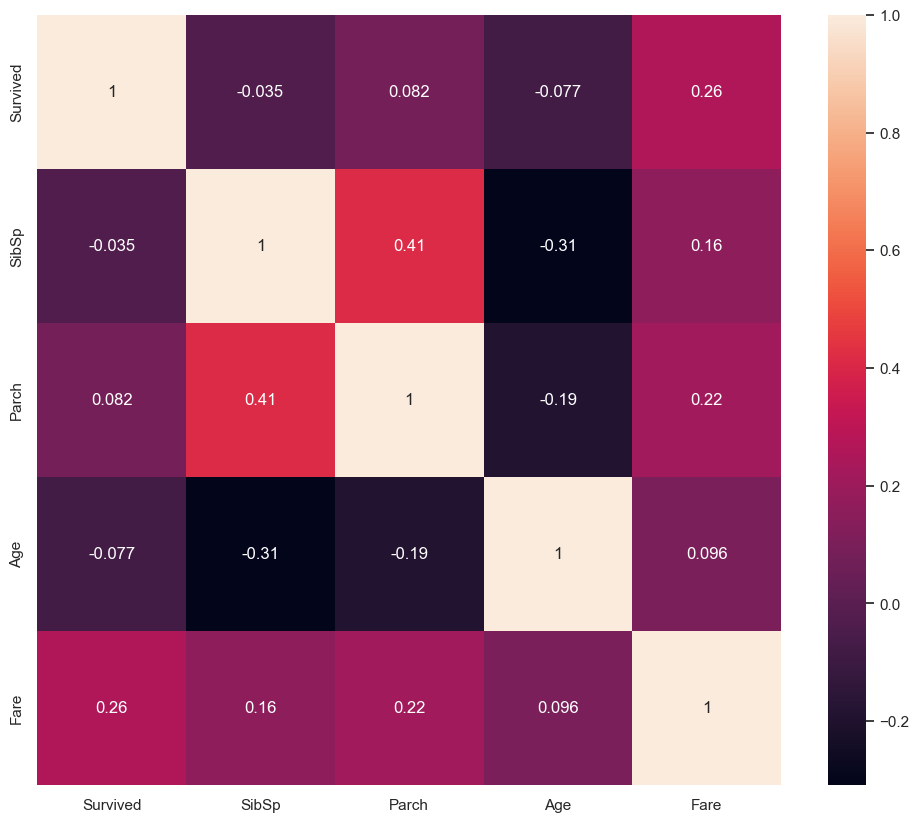

In [7]:
plt.figure(figsize = (12,10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot = True)
plt.show()

**Conclusion :**

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

## <font color = "green">**Sibsp - Number of siblings / spouses aboard the Titanic** </font>

In [8]:
data['SibSp'].nunique()

7

In [9]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

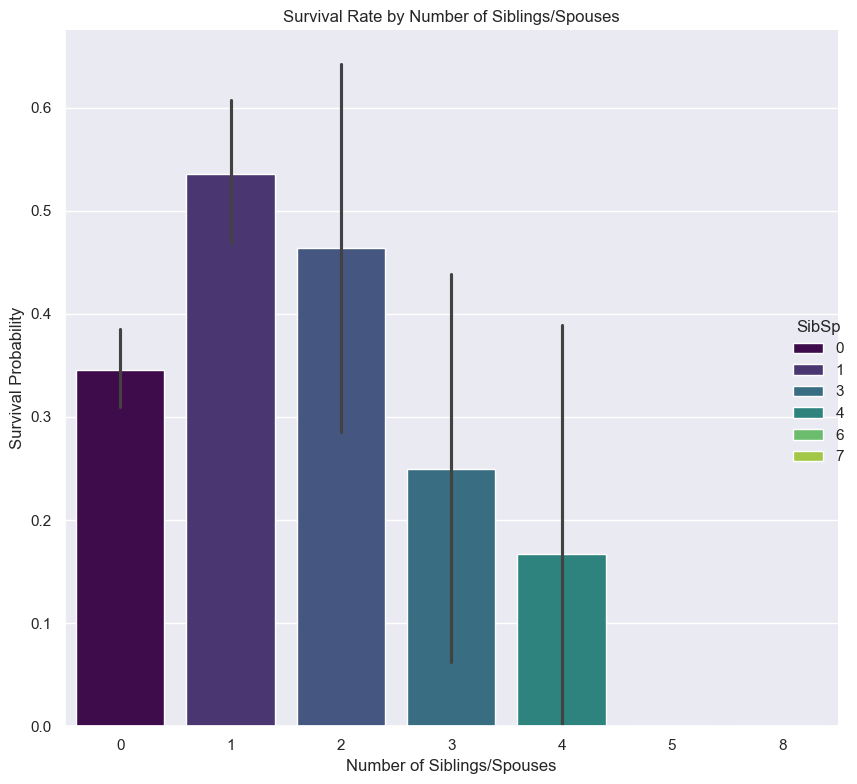

In [10]:
sns.catplot(x = "SibSp", y = "Survived", hue="SibSp", data = data, kind = "bar", height = 8, palette = "viridis").set_ylabels("Survival Probability")
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.tight_layout()
plt.show()

It seems that passengers having a lot of siblings/spouses have less chance to survive.
Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

## <font color = "green">**AGE**</font>

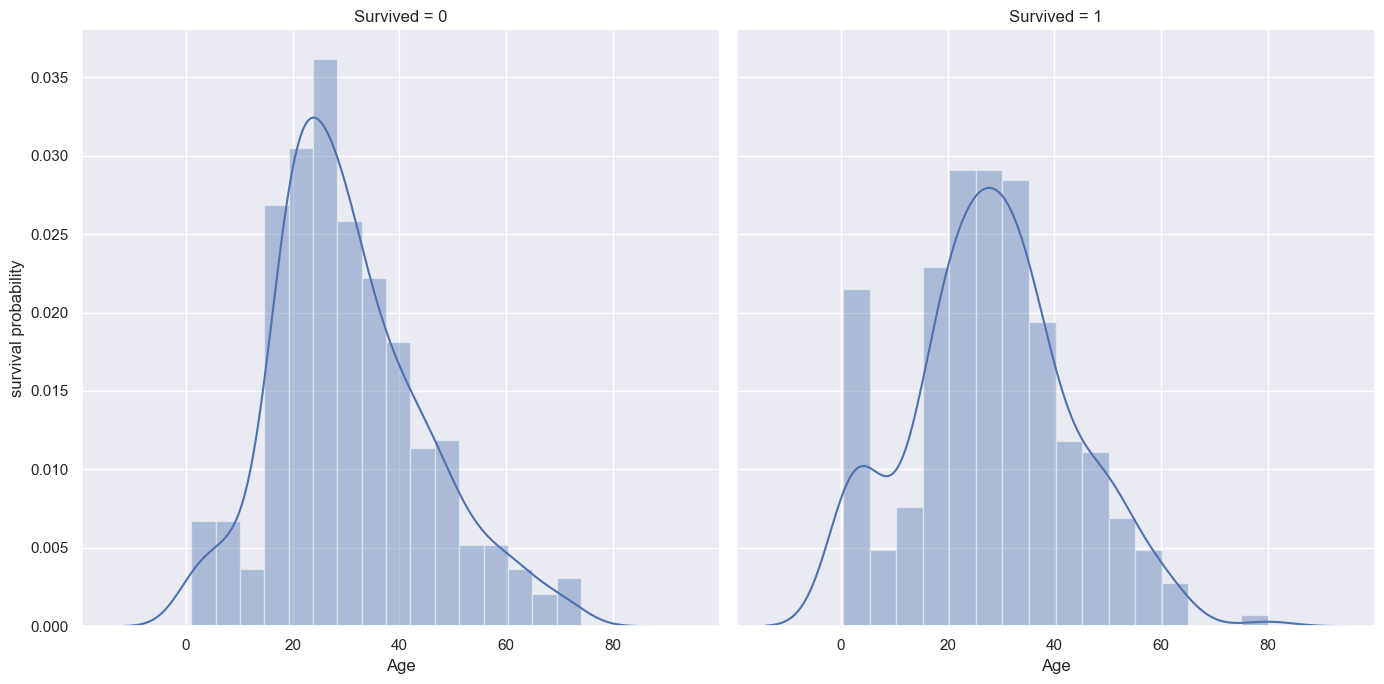

In [11]:
age_visual = sns.FacetGrid(data, col = 'Survived', height=7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")
plt.show()

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

## <font color = "green">**SEX**</font>

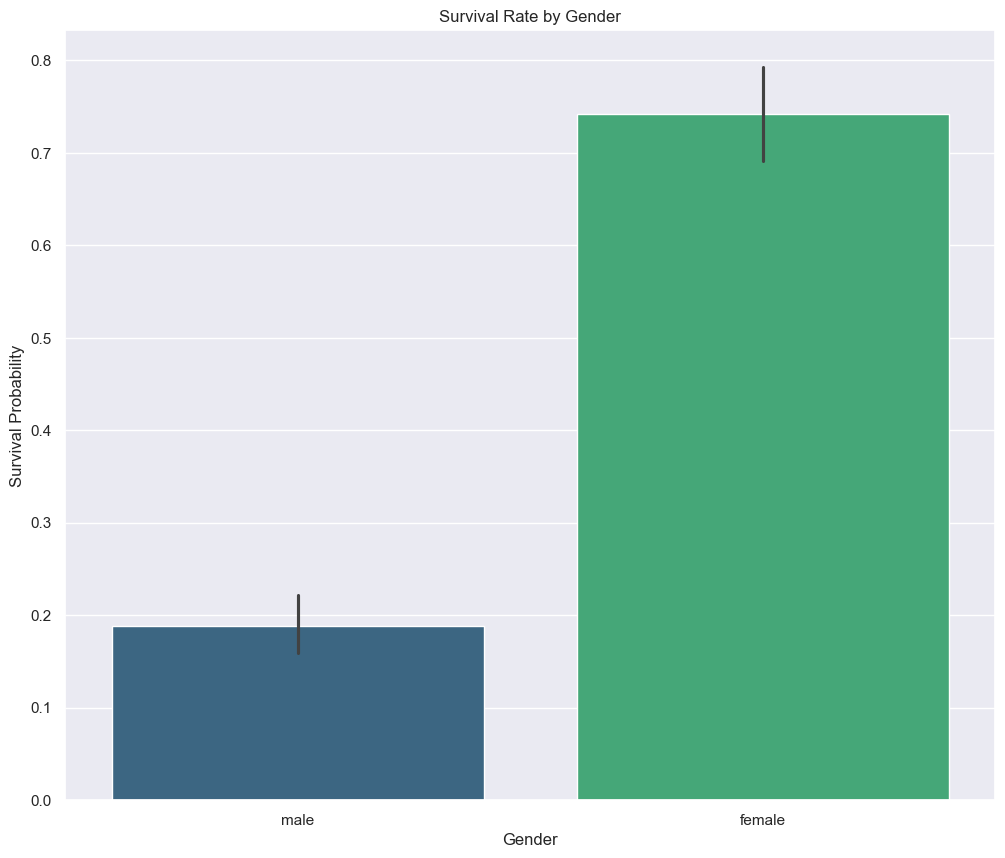

In [12]:
age_plot = sns.barplot(x="Sex", y="Survived", hue = "Sex", data=data, palette = "viridis")
age_plot.set_ylabel("Survival Probability")
age_plot.set_xlabel("Gender")
age_plot.set_title("Survival Rate by Gender")
plt.show()

In [13]:
data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation - **Women and children first**.

## <font color = "green">**PClass**</font>

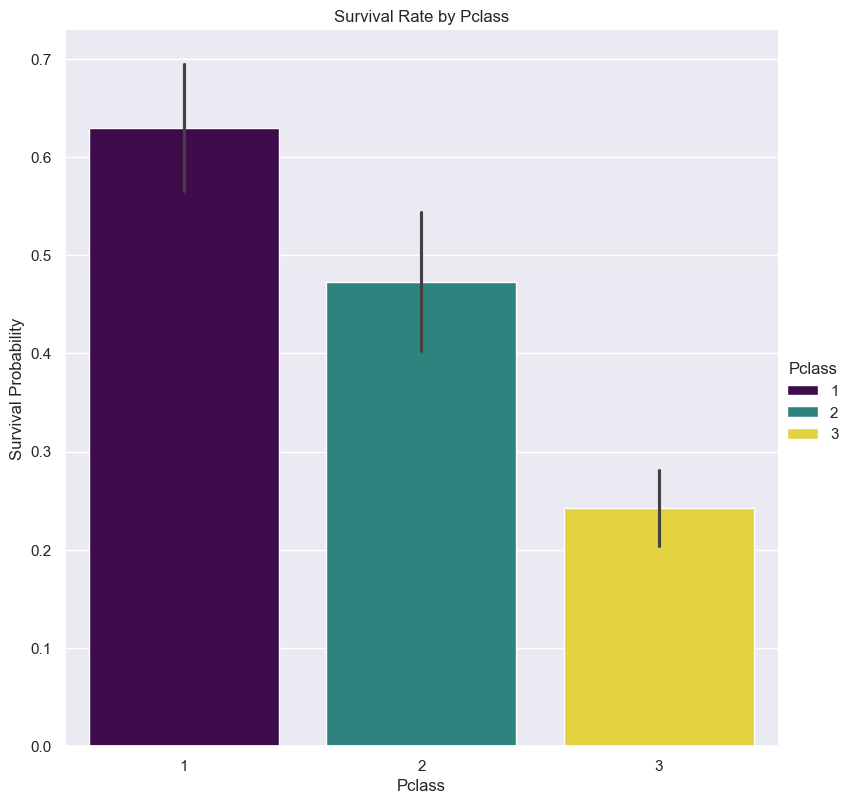

In [14]:
pclass = sns.catplot(x="Pclass", y="Survived", hue="Pclass", palette="viridis",
                     data=data, kind="bar", height=8)

# Access the first axes
ax = pclass.axes[0, 0]
ax.set_ylabel("Survival Probability")
ax.set_xlabel("Pclass")
ax.set_title("Survival Rate by Pclass")

plt.show()

## <font color = "green">**Pclass vs Survived by Sex**</font>

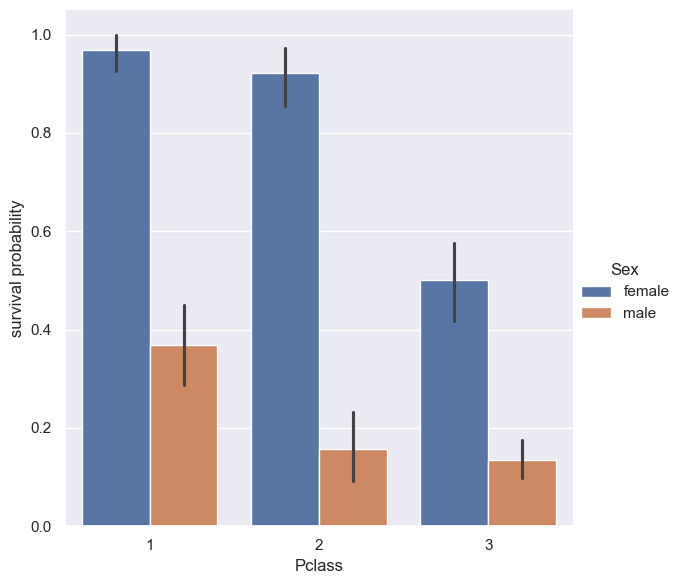

In [15]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=data, height=6, kind="bar")
g = g.set_ylabels("survival probability")
plt.show()

import warnings
warnings.filterwarnings("ignore")

## <font color = "green">**Embarked**</font>

In [16]:
data["Embarked"].isnull().sum()

np.int64(2)

In [17]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
data["Embarked"] = data["Embarked"].fillna("S") 
##Fill Embarked with 'S' i.e. the most frequent values

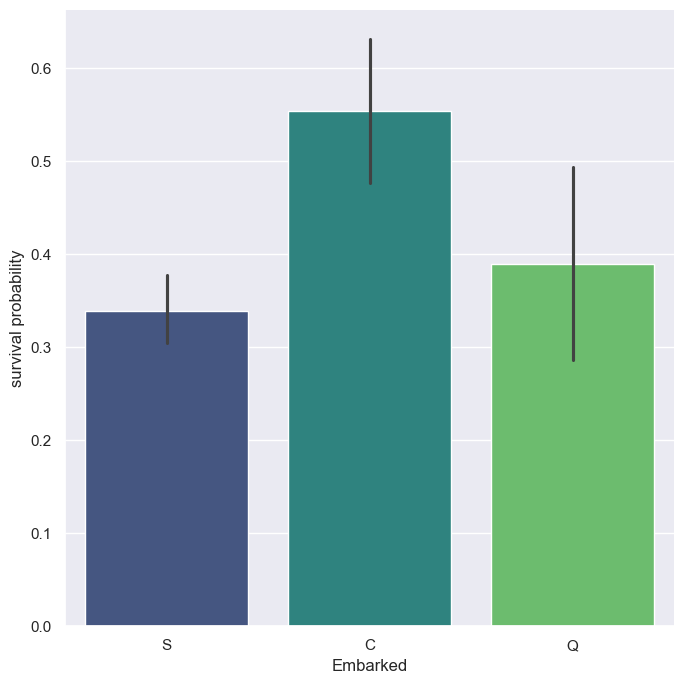

In [19]:
g = sns.catplot(x="Embarked", y="Survived", hue = "Embarked", palette="viridis", data=data, height=7, kind="bar")
g = g.set_ylabels("survival probability")
plt.show()

Passenger coming from Cherbourg (C) have more chance to survive.

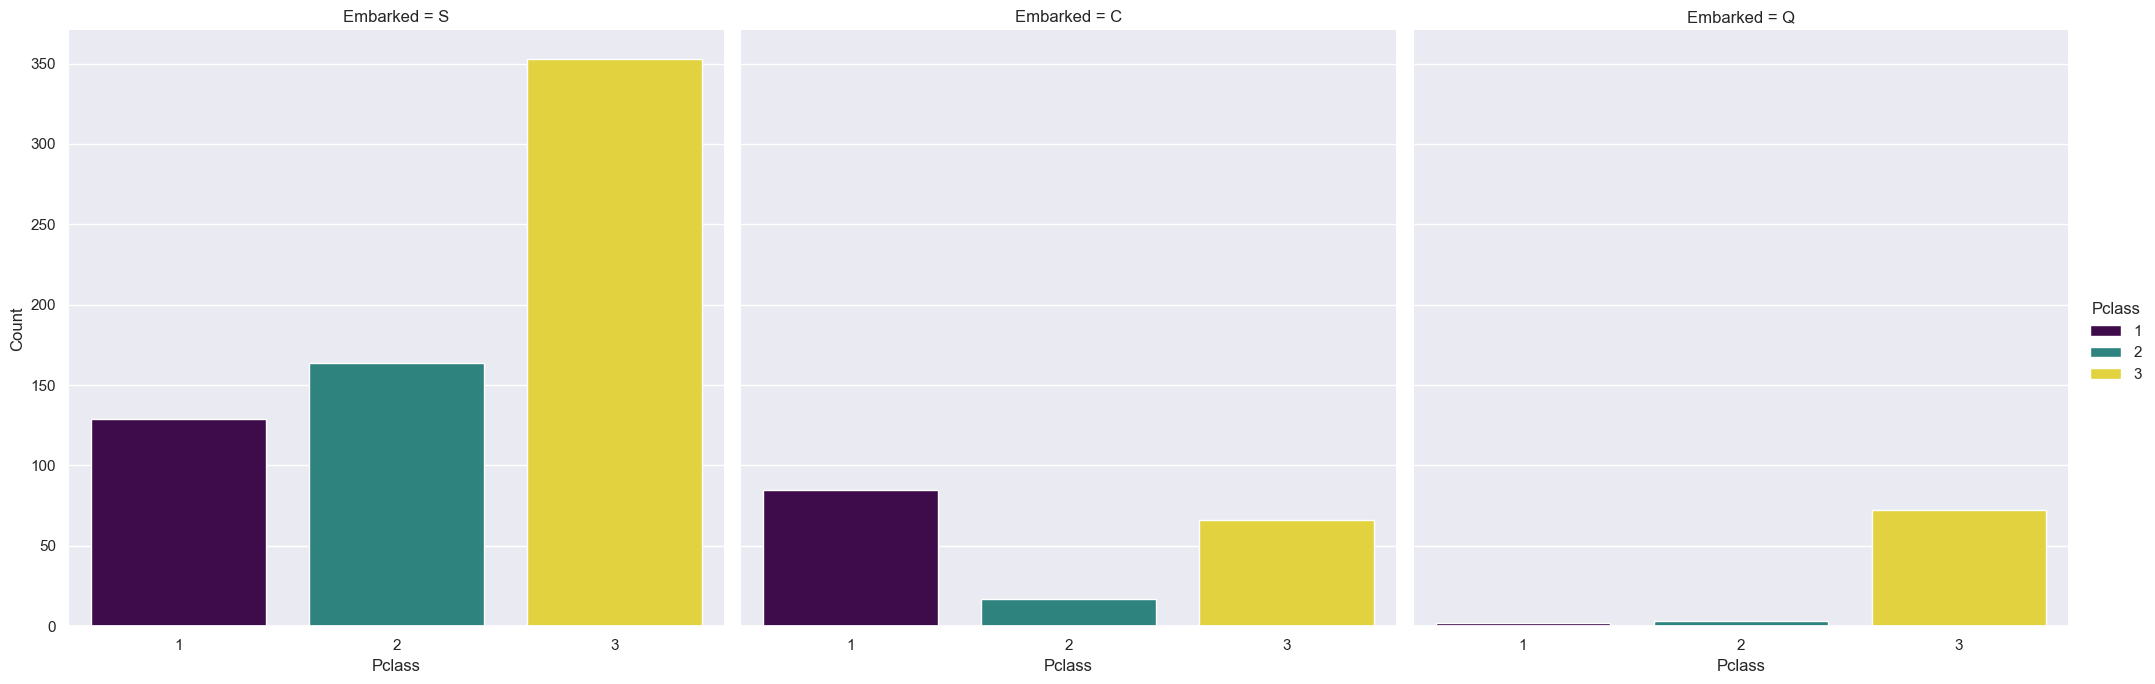

In [20]:
# Explore Pclass vs Embarked 
g = sns.catplot(x = "Pclass", col="Embarked", hue = "Pclass", palette = "viridis", data=data, height=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.show()

Cherbourg passengers are mostly in first class which have the highest survival rate.
Southampton (S) and Queenstown (Q) passangers are mostly in third class.

## <font color = "green">**Preparing Data**</font>

In [21]:
data = pd.read_csv('titanic_data.csv')

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [25]:
data["Age"].isnull().sum()

np.int64(0)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [28]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [31]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [32]:
ports = {"S": 0, "C": 1, "Q": 2}

data['Embarked'] = data['Embarked'].map(ports)

In [33]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## <font color = "green">**Splitting Data**</font>

In [35]:
#input and output data
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [44]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 0)

 ## <font color = "green">**Feature Scaling** </font> 

In [38]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## <font color = "green">**Classification**</font>

In [39]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)

In [40]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [41]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [45]:
# finding accuracy
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [43]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.22
Support Vector      :  82.09
Decision Tree       :  75.0
K-NN Classifier     :  80.97
Random Forest       :  83.21
